In [123]:
import pandas as pd
import re

In [133]:
dataset=pd.read_excel('Downloads/covid-19.xlsx')

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0,Epidemic intelligence national data,NaN
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.0,0,Epidemic intelligence national data,NaN
2,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-03,0.0,0,Epidemic intelligence national data,NaN
3,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-04,0.0,0,Epidemic intelligence national data,NaN
4,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-05,0.0,0,Epidemic intelligence national data,NaN


In [131]:
vaccine=pd.read_csv('Documents/vaccine.csv')

In [134]:
dataset_se = dataset[dataset["country"]=="Sweden"].copy().fillna(0).drop(columns=['source', 'note','country_code','continent'])
dataset_se["NoIndicator"] = dataset_se["population"]-dataset_se["weekly_count"]

In [135]:
vaccine_se = vaccine[vaccine["ReportingCountry"]=="SE"].copy().fillna(0)

In [136]:
dataset_se.head(100)

,country,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,NoIndicator
38768,Sweden,10327589,cases,0.0,2020-01,0.000000,0,10327589.0
38769,Sweden,10327589,cases,0.0,2020-02,0.000000,0,10327589.0
38770,Sweden,10327589,cases,0.0,2020-03,0.000000,0,10327589.0
38771,Sweden,10327589,cases,0.0,2020-04,0.000000,0,10327589.0
38772,Sweden,10327589,cases,0.0,2020-05,0.000000,0,10327589.0
...,...,...,...,...,...,...,...,...
38863,Sweden,10327589,cases,5910.0,2021-43,107.498468,1173234,10321679.0
38864,Sweden,10327589,cases,5059.0,2021-44,106.210656,1178293,10322530.0
38865,Sweden,10327589,cases,5819.0,2021-45,105.329521,1184112,10321770.0
38866,Sweden,10327589,cases,7094.0,2021-46,125.034023,1191206,10320495.0


In [137]:
vaccine_se["year_week"] = vaccine_se["YearWeekISO"].apply(lambda x: re.sub('-W', '-',x))
vaccine_se = vaccine_se.drop(columns=['YearWeekISO','Population','Region','UnknownDose'])

In [138]:
vaccine_se.head(100)

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,TargetGroup,Vaccine,year_week
218496,SE,2059729.0,0.0,0.0,0,0.0,0,0,ALL,MOD,2020-52
218497,SE,857762.0,0.0,0.0,0,0.0,0,0,ALL,MOD,2020-52
218498,SE,521829.0,0.0,0.0,0,0.0,0,0,ALL,MOD,2020-52
218499,SE,10327589.0,0.0,0.0,0,0.0,0,0,ALL,AZ,2020-52
218500,SE,2059729.0,0.0,0.0,0,0.0,0,0,ALL,AZ,2020-52
...,...,...,...,...,...,...,...,...,...,...,...
218591,SE,536306.0,0.0,0.0,8155,0.0,0,0,Age80+,COM,2020-53
218592,SE,536306.0,0.0,0.0,0,0.0,0,0,Age80+,AZ,2020-53
218593,SE,74894.0,0.0,0.0,9097,0.0,0,0,LTCF,UNK,2020-53
218594,SE,10327589.0,87750.0,0.0,36648,0.0,0,0,ALL,COM,2021-01


In [139]:
sweden_data = pd.merge(dataset_se, vaccine_se, on="year_week")

In [140]:
sweden_data.head(200)

,country,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,NoIndicator,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,TargetGroup,Vaccine
0,Sweden,10327589,cases,37134.0,2020-52,806.654874,421041,10290455.0,SE,2059729.0,0.0,0.0,0,0.0,0,0,ALL,MOD
1,Sweden,10327589,cases,37134.0,2020-52,806.654874,421041,10290455.0,SE,857762.0,0.0,0.0,0,0.0,0,0,ALL,MOD
2,Sweden,10327589,cases,37134.0,2020-52,806.654874,421041,10290455.0,SE,521829.0,0.0,0.0,0,0.0,0,0,ALL,MOD
3,Sweden,10327589,cases,37134.0,2020-52,806.654874,421041,10290455.0,SE,10327589.0,0.0,0.0,0,0.0,0,0,ALL,AZ
4,Sweden,10327589,cases,37134.0,2020-52,806.654874,421041,10290455.0,SE,2059729.0,0.0,0.0,0,0.0,0,0,ALL,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Sweden,10327589,deaths,666.0,2020-53,126.457395,10088,10326923.0,SE,74894.0,0.0,0.0,9097,0.0,0,0,LTCF,UNK
196,Sweden,10327589,cases,39449.0,2021-01,782.079922,501811,10288140.0,SE,10327589.0,87750.0,0.0,36648,0.0,0,0,ALL,COM
197,Sweden,10327589,cases,39449.0,2021-01,782.079922,501811,10288140.0,SE,2377081.0,0.0,0.0,5183,0.0,0,0,ALL,COM
198,Sweden,10327589,cases,39449.0,2021-01,782.079922,501811,10288140.0,SE,1727398.0,0.0,0.0,8605,0.0,0,0,ALL,COM


In [141]:
import plotly.express as px
import matplotlib.pyplot as plt
plt = px.scatter(sweden_data.query("country=='Sweden'"), x="weekly_count", y="Vaccine", 
           color="TargetGroup", size="FirstDose", animation_frame="year_week", animation_group="TargetGroup",
                 hover_name="year_week", log_x=True,size_max=100)
plt.show()

 
# # df = px.data.gapminder()
# px.scatter(sweden_data, x="rate_14_day", y="indicator", animation_frame="weekly_count", animation_group="TargetGroup",
#            size="FirstDose", color="TargetGroup", hover_name="year_week",
#            log_x=True, size_max=60 )
 


In [142]:
import plotly.express as px
import matplotlib.pyplot as plt
plt = px.scatter(sweden_data.query("country=='Sweden'"), x="weekly_count", y="Vaccine", 
           color="TargetGroup", size="FirstDose",
                 hover_name="year_week", log_x=True,size_max=100)
plt.show()

In [143]:
import plotly.express as px
import matplotlib.pyplot as plt
plt = px.scatter(sweden_data.query("country=='Sweden'"), x="weekly_count", y="Vaccine", 
           color="TargetGroup", size="SecondDose",
                 hover_name="year_week", log_x=True,size_max=100)
plt.show()

In [144]:
Total = vaccine_se['FirstDose'].sum()
Total2 = vaccine_se['SecondDose'].sum()
print (Total)
print (Total2)

22069611
21466452


<AxesSubplot:ylabel='value'>

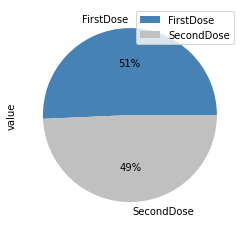

In [145]:
dataframe = pd.DataFrame({'Vaccine': ['FirstDose', 'SecondDose'],
                          'value': [Total,Total2]})
  
# Defining colors for the pie chart
colors = [ 'steelblue','silver']
  
# Plotting the pie chart for above dataframe
dataframe.groupby(['Vaccine']).sum().plot(
    kind='pie', y='value', 
  autopct='%1.0f%%', colors=colors)

<AxesSubplot:xlabel='FirstDose', ylabel='Density'>

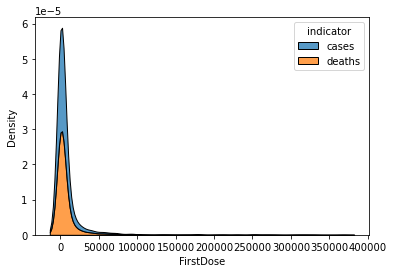

In [157]:
import seaborn as sns
sns.kdeplot(data=sweden_data, x="FirstDose" ,hue="indicator", multiple="stack" )

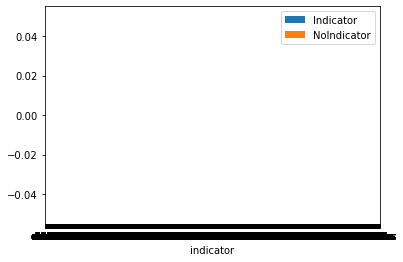

In [167]:
speed = sweden_data["weekly_count"]
lifespan = sweden_data["NoIndicator"]
index = sweden_data["indicator"]
df = pd.DataFrame({'Indicator': speed,
                   'NoIndicator': lifespan}, index=index)
ax = df.plot.bar(rot=0)

In [168]:
dataframe = pd.DataFrame({'Vaccine': ['weekly_count', 'NoIndicator'],
                          'value': ['weekly_count','NoIndicator']})
  
# Defining colors for the pie chart
colors = [ 'steelblue','silver']
  
# Plotting the pie chart for above dataframe
dataframe.groupby(['Vaccine']).sum().plot(
    kind='pie', y='value', 
  autopct='%1.0f%%', colors=colors)

TypeError: '<' not supported between instances of 'str' and 'int'

array([[<AxesSubplot:title={'center':'NoIndicator'}>]], dtype=object)

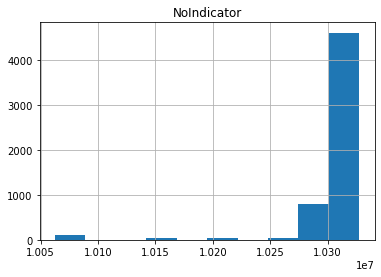

In [169]:
sweden_data.hist(column='NoIndicator')